In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import subprocess
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import librosa
import numpy as np
import pandas as pd
import glob
import os


In [11]:
import pandas as pd

# Load the DataFrame from CSV
csv_path = '/Users/manraj/Desktop/Coswara-Data/Extracted_Audio_CSV/librosa_features.csv'
dataframe = pd.read_csv(csv_path)

# Column mapping
column_mapping = {
    "id": "User ID",
    "a": "Age (number)",
    "covid_status": "Health status (e.g. : positive_mild, healthy,etc.)",
    "record_date": "Date when the user recorded and submitted the samples",
    "ep": "Proficient in English (y/n)",
    "g": "Gender (male/female/other)",
    "l_c": "Country",
    "l_l": "Locality",
    "l_s": "State",
    "rU": "Returning User (y/n)",
    "asthma": "Asthma (True/False)",
    "cough": "Cough (True/False)",
    "smoker": "Smoker (True/False)",
    "test_status": "Status of COVID Test (p->Positive, n->Negative, na-> Not taken Test)",
    "ht": "Hypertension  (True/False)",
    "cold": "Cold  (True/False)",
    "diabetes": "Diabetes  (True/False)",
    "diarrhoea": "Diarrheoa (True/False)",
    "um": "Using Mask (y/n)",
    "ihd": "Ischemic Heart Disease (True/False)",
    "bd": "Breathing Difficulties (True/False)",
    "st": "Sore Throat (True/False)",
    "fever": "Fever (True/False)",
    "ftg": "Fatigue (True/False)",
    "mp": "Muscle Pain (True/False)",
    "loss_of_smell": "Loss of Smell & Taste (True/False)",
    "cld": "Chronic Lung Disease (True/False)",
    "pneumonia": "Pneumonia (True/False)",
    "ctScan": "CT-Scan (y/n if the user has taken a test)",
    "testType": "Type of test (RAT/RT-PCR)",
    "test_date": "Date of COVID Test (if taken)",
    "vacc": "Vaccination status (y->both doses, p->one dose(partially vaccinated), n->no doses)",
    "ctDate": "Date of CT-Scan",
    "ctScore": "CT-Score",
    "others_resp": "Respiratory illnesses other than the listed ones (True/False)",
    "others_preexist": "Pre-existing conditions other than the listed ones (True/False)"
}

true_false_columns = [
    'ep', 'smoker', 'rU', 'um', 'cough', 'cold', 'diarrhoea', 'bd', 'st', 
    'fever', 'ftg', 'mp', 'loss_of_smell', 'cld','asthma', 'pneumonia', 'others_resp', 
    'ht', 'diabetes', 'others_preexist', 'ctScan', 'ihd'
]

# Update true_false_columns with mapped names
true_false_columns = [column_mapping[col] for col in true_false_columns]

# Rename columns in the DataFrame
dataframe = dataframe.rename(columns=column_mapping)

# Fill missing values in true_false_columns with False
for col in true_false_columns:
    if col in dataframe.columns:
        dataframe[col] = dataframe[col].fillna(False)

# Display the DataFrame after transformation
print("DataFrame after renaming and replacing null values with False:")
print(dataframe.head())

DataFrame after renaming and replacing null values with False:
                        User ID  Age (number)  Cold  (True/False)  \
0  9hXEs9OejdVxG6JJGCyKQpqVvy43            67                True   
1  dPi1G2i821MDlbBUQWboTaExz023            24               False   
2  TqZXC5KdCZOC4T7p69TUNnU9abD3            81                True   
3  356wSucV0OV6VQMvozjX63pIXrH2            24                True   
4  OPOiHCtB3WXhEdnsofhMpnP8bak1            38               False   

  Date when the user recorded and submitted the samples  Cough (True/False)  \
0                                         2021-07-19                   True   
1                                         2021-08-16                  False   
2                                         2021-08-16                   True   
3                                         2021-07-28                   True   
4                                         2021-07-15                  False   

  Health status (e.g. : positive_mild, healthy,

/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/1788962148.py:5: DtypeWarning: Columns (38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(csv_path)


In [12]:
dataframe.describe()

Age (number)    CT-Score      fV      QUALITY   QUALITY_vowel-o_labels  \
count   2746.000000  153.000000  2066.0  2745.000000              2745.000000   
mean      35.154771    5.307190     2.0     1.749727                 1.554098   
std       14.096043    5.369604     0.0     0.565358                 0.698347   
min        1.000000    0.000000     2.0     0.000000                 0.000000   
25%       25.000000    0.000000     2.0     2.000000                 1.000000   
50%       31.000000    5.000000     2.0     2.000000                 2.000000   
75%       43.750000    8.000000     2.0     2.000000                 2.000000   
max       99.000000   25.000000     2.0     2.000000                 2.000000   

        QUALITY_counting-fast_labels   QUALITY_vowel-e_labels  \
count                    2746.000000              2746.000000   
mean                        1.693372                 1.693736   
std                         0.630095                 0.634592   
min                         0.000000                 0.000000   
25%                         2.000000                 2.000000   
50%                         2.000000                 2.000000   
75%                         2.000000                 2.000000   
max                         2.000000                 2.000000   

        QUALITY_breathing-deep_labels   QUALITY_breathing-shallow_labels  \
count                     2746.000000                        2746.000000   
mean                         1.550255                           1.522214   
std                          0.759533                           0.770387   
min                          0.000000                           0.000000   
25%                          1.000000                           1.000000   
50%                          2.000000                           2.000000   
75%                          2.000000                           2.000000   
max                          2.000000                           2.000000   

        QUALITY_counting-normal_labels  ...  \
count                      2746.000000  ...   
mean                          1.746905  ...   
std                           0.599666  ...   
min                           0.000000  ...   
25%                           2.000000  ...   
50%                           2.000000  ...   
75%                           2.000000  ...   
max                           2.000000  ...   

       spectral_contrast_6_cough_heavy_cough_heavy  \
count                                    10.000000   
mean                                     24.846283   
std                                       6.902964   
min                                      15.459069   
25%                                      20.253000   
50%                                      22.320781   
75%                                      30.274423   
max                                      37.095449   

       duration_cough_heavy_cough_heavy  duration_cough_shallow  \
count                       2703.000000             2705.000000   
mean                           5.197398                4.631728   
std                            2.529215                2.476497   
min                            0.032000                0.359909   
25%                            3.562667                3.050667   
50%                            4.911020                4.330667   
75%                            6.442667                5.717333   
max                           29.941333               29.952000   

       duration_counting_fast  duration_counting_normal  \
count             2706.000000               2705.000000   
mean                 7.476881                 13.754981   
std                  2.716460                  4.719351   
min                  0.032000                  0.032000   
25%                  5.852571                 11.317333   
50%                  7.413333                 13.621333   
75%                  8.736000                 15.957333   
max                

In [13]:
# Specified columns to show
columns_to_show = [
    'Proficient in English (y/n)',
    'Returning User (y/n)',
    'Asthma (True/False)',
    'Cough (True/False)',
    'Smoker (True/False)',
    'Hypertension  (True/False)',
    'Cold  (True/False)',
    'Diabetes  (True/False)',
    'Diarrheoa (True/False)',
    'Using Mask (y/n)',
    'Ischemic Heart Disease (True/False)',
    'Breathing Difficulties (True/False)',
    'Sore Throat (True/False)',
    'Fever (True/False)',
    'Fatigue (True/False)',
    'Muscle Pain (True/False)',
    'Status of COVID Test (p->Positive, n->Negative, na-> Not taken Test)',
    'Health status (e.g. : positive_mild, healthy,etc.)',
    'Loss of Smell & Taste (True/False)',
    'Chronic Lung Disease (True/False)',
    'Pneumonia (True/False)',
    'CT-Scan (y/n if the user has taken a test)',
    'Vaccination status (y->both doses, p->one dose(partially vaccinated), n->no doses)',
    'Respiratory illnesses other than the listed ones (True/False)',
    'Pre-existing conditions other than the listed ones (True/False)',
    'Gender (male/female/other)',
    'Type of test (RAT/RT-PCR)'
]

# Display value counts for specified columns
for col in columns_to_show:
    if col in dataframe.columns:
        print(dataframe[col].value_counts())
        print("-------")
    else:
        print(f"Column '{col}' is missing in the DataFrame")
        print("-------")


Proficient in English (y/n)
y    2514
n     232
Name: count, dtype: int64
-------
Returning User (y/n)
n        2003
False     680
y          63
Name: count, dtype: int64
-------
Asthma (True/False)
False    2612
True      134
Name: count, dtype: int64
-------
Cough (True/False)
False    2094
True      652
Name: count, dtype: int64
-------
Smoker (True/False)
False    1660
n         850
True      123
y         102
False      11
Name: count, dtype: int64
-------
Hypertension  (True/False)
False    2513
True      233
Name: count, dtype: int64
-------
Cold  (True/False)
False    2258
True      488
Name: count, dtype: int64
-------
Diabetes  (True/False)
False    2514
True      232
Name: count, dtype: int64
-------
Diarrheoa (True/False)
False    2694
True       52
Name: count, dtype: int64
-------
Using Mask (y/n)
False    1038
n         979
y         729
Name: count, dtype: int64
-------
Ischemic Heart Disease (True/False)
False    2709
True       37
Name: count, dtype: int64
-------
Bre

In [14]:
# Define the mappings for replacement
replacement_mappings = {
    'Proficient in English (y/n)': {'y': 'Yes', 'n': 'No'},
    'Returning User (y/n)': {'y': 'Yes', 'n': 'No', 'False': 'No'},
    'Smoker (True/False)': {'True': 'True', 'False': 'False', 'Yes': 'True', 'No': 'False'},
    'Using Mask (y/n)': {'Yes': 'True', 'No': 'False'},
    'CT-Scan (y/n if the user has taken a test)': {'Yes': 'True', 'No': 'False'},
    'Status of COVID Test (p->Positive, n->Negative, na-> Not taken Test)': {'p': 'Positive', 'n': 'Negative', 'na': 'Not Taken Test','ut': 'Under Testing'},
    'Vaccination status (y->both doses, p->one dose(partially vaccinated), n->no doses)': {'y': 'Both Doses', 'p': 'One Dose', 'n': 'No Doses'},
    'Gender (male/female/other)': {'male': 'Male', 'female': 'Female', 'other': 'Other'},
    'Type of test (RAT/RT-PCR)': {'rtpcr': 'RT-PCR', 'rat': 'RAT'},
    'Returning User (y/n)': {'n':'No','y':'Yes',False:'No'},
    'Smoker (True/False)': {'False':False,'True':True,'n':False,'y':True},
    'Using Mask (y/n)': {'False':False,'True':True,'n':False,'y':True},
    'CT-Scan (y/n if the user has taken a test)': {'False':False,'True':True,'n':False,'y':True},
}

# Apply the replacements
for col, mapping in replacement_mappings.items():
    dataframe[col] = dataframe[col].replace(mapping)

# Print value counts again to check the replacements
for col in columns_to_show:
    print(dataframe[col].value_counts())
    print("-------")


Proficient in English (y/n)
Yes    2514
No      232
Name: count, dtype: int64
-------
Returning User (y/n)
No     2683
Yes      63
Name: count, dtype: int64
-------
Asthma (True/False)
False    2612
True      134
Name: count, dtype: int64
-------
Cough (True/False)
False    2094
True      652
Name: count, dtype: int64
-------
Smoker (True/False)
False    2521
True      225
Name: count, dtype: int64
-------
Hypertension  (True/False)
False    2513
True      233
Name: count, dtype: int64
-------
Cold  (True/False)
False    2258
True      488
Name: count, dtype: int64
-------
Diabetes  (True/False)
False    2514
True      232
Name: count, dtype: int64
-------
Diarrheoa (True/False)
False    2694
True       52
Name: count, dtype: int64
-------
Using Mask (y/n)
False    2017
True      729
Name: count, dtype: int64
-------
Ischemic Heart Disease (True/False)
False    2709
True       37
Name: count, dtype: int64
-------
Breathing Difficulties (True/False)
False    2535
True      211
Name: cou

In [15]:
dataframe.isna().sum()

User ID                                                   0
Age (number)                                              0
Cold  (True/False)                                        0
Date when the user recorded and submitted the samples     0
Cough (True/False)                                        0
                                                         ..
duration_breathing_deep                                  39
duration_breathing_shallow                               54
duration_vowel_a                                         49
duration_vowel_e                                         38
duration_vowel_o                                         47
Length: 299, dtype: int64

In [16]:
# List of columns to fill with False
columns_to_fill_false = [
    'Date of CT-Scan', 'CT-Score', 'dT', 'Type of test (RAT/RT-PCR)',
    'Date of COVID Test (if taken)', 'Status of COVID Test (p->Positive, n->Negative, na-> Not taken Test)',
    'Vaccination status (y->both doses, p->one dose(partially vaccinated), n->no doses)', 'Locality',
    'iF', 'date', 'test'
]

# Fill missing values with False
dataframe[columns_to_fill_false] = dataframe[columns_to_fill_false].fillna(False)


In [17]:
dataframe.isna().sum()

User ID                                                   0
Age (number)                                              0
Cold  (True/False)                                        0
Date when the user recorded and submitted the samples     0
Cough (True/False)                                        0
                                                         ..
duration_breathing_deep                                  39
duration_breathing_shallow                               54
duration_vowel_a                                         49
duration_vowel_e                                         38
duration_vowel_o                                         47
Length: 299, dtype: int64

In [18]:
# Print value counts again to check the replacements
for col in columns_to_show:
    print(dataframe[col].value_counts())
    print("-------")


Proficient in English (y/n)
Yes    2514
No      232
Name: count, dtype: int64
-------
Returning User (y/n)
No     2683
Yes      63
Name: count, dtype: int64
-------
Asthma (True/False)
False    2612
True      134
Name: count, dtype: int64
-------
Cough (True/False)
False    2094
True      652
Name: count, dtype: int64
-------
Smoker (True/False)
False    2521
True      225
Name: count, dtype: int64
-------
Hypertension  (True/False)
False    2513
True      233
Name: count, dtype: int64
-------
Cold  (True/False)
False    2258
True      488
Name: count, dtype: int64
-------
Diabetes  (True/False)
False    2514
True      232
Name: count, dtype: int64
-------
Diarrheoa (True/False)
False    2694
True       52
Name: count, dtype: int64
-------
Using Mask (y/n)
False    2017
True      729
Name: count, dtype: int64
-------
Ischemic Heart Disease (True/False)
False    2709
True       37
Name: count, dtype: int64
-------
Breathing Difficulties (True/False)
False    2535
True      211
Name: cou

In [19]:
replacement_mappings = {
    'Proficient in English (y/n)': {'y': 'Yes', 'n': 'No'},
    'Returning User (y/n)': {'y': 'Yes', 'n': 'No', 'False': 'No'},
    'Smoker (True/False)': {'True': 'True', 'False': 'False', 'Yes': 'True', 'No': 'False'},
    'Using Mask (y/n)': {'Yes': 'True', 'No': 'False'},
    'CT-Scan (y/n if the user has taken a test)': {'Yes': 'True', 'No': 'False'},
    'Status of COVID Test (p->Positive, n->Negative, na-> Not taken Test)': {'p': 'Positive', 'n': 'Negative', 'na': 'Not Taken Test','ut': 'Under Testing',False:'Not Taken Test'},
    'Vaccination status (y->both doses, p->one dose(partially vaccinated), n->no doses)': {'y': 'Both Doses', 'p': 'One Dose', 'n': 'No Doses',False:'No Doses'},
    'Gender (male/female/other)': {'male': 'Male', 'female': 'Female', 'other': 'Other'},
    'Type of test (RAT/RT-PCR)': {'rtpcr': 'RT-PCR', 'rat': 'RAT',False:'False'},
    'Returning User (y/n)': {'n':'No','y':'Yes',False:'No'},
    'Smoker (True/False)': {'False':False,'True':True,'n':False,'y':True},
    'Using Mask (y/n)': {'False':False,'True':True,'n':False,'y':True},
    'CT-Scan (y/n if the user has taken a test)': {'False':False,'True':True,'n':False,'y':True},
    'Health status (e.g. : positive_mild, healthy,etc.)': {
        'healthy': 'Negative', 'positive_mild': 'Positive', 'no_resp_illness_exposed': 'Negative',
        'positive_moderate': 'Positive', 'resp_illness_not_identified': 'Illness Not Identified',
        'recovered_full': 'Negative', 'positive_asymp': 'Positive', 'under_validation': 'Illness Not Identified'
    }
}

# Apply the replacements
for col, mapping in replacement_mappings.items():
    dataframe[col] = dataframe[col].replace(mapping)

# Print value counts again to check the replacements
for col in columns_to_show:
    print(dataframe[col].value_counts())
    print("-------")


Proficient in English (y/n)
Yes    2514
No      232
Name: count, dtype: int64
-------
Returning User (y/n)
No     2683
Yes      63
Name: count, dtype: int64
-------
Asthma (True/False)
False    2612
True      134
Name: count, dtype: int64
-------
Cough (True/False)
False    2094
True      652
Name: count, dtype: int64
-------
Smoker (True/False)
False    2521
True      225
Name: count, dtype: int64
-------
Hypertension  (True/False)
False    2513
True      233
Name: count, dtype: int64
-------
Cold  (True/False)
False    2258
True      488
Name: count, dtype: int64
-------
Diabetes  (True/False)
False    2514
True      232
Name: count, dtype: int64
-------
Diarrheoa (True/False)
False    2694
True       52
Name: count, dtype: int64
-------
Using Mask (y/n)
False    2017
True      729
Name: count, dtype: int64
-------
Ischemic Heart Disease (True/False)
False    2709
True       37
Name: count, dtype: int64
-------
Breathing Difficulties (True/False)
False    2535
True      211
Name: cou

In [20]:
upper = 80
lower = 18

dataframe = dataframe[(dataframe['Age (number)'] >= lower) & (dataframe['Age (number)'] <= upper)]

In [21]:
dataframe.head()

User ID  Age (number)  Cold  (True/False)  \
0  9hXEs9OejdVxG6JJGCyKQpqVvy43            67                True   
1  dPi1G2i821MDlbBUQWboTaExz023            24               False   
3  356wSucV0OV6VQMvozjX63pIXrH2            24                True   
4  OPOiHCtB3WXhEdnsofhMpnP8bak1            38               False   
5  XbOUJCUl8GWEpQpIRMvujDE1sTE2            57                True   

  Date when the user recorded and submitted the samples  Cough (True/False)  \
0                                         2021-07-19                   True   
1                                         2021-08-16                  False   
3                                         2021-07-28                   True   
4                                         2021-07-15                  False   
5                                         2021-07-17                   True   

  Health status (e.g. : positive_mild, healthy,etc.) Date of CT-Scan  \
0                                           Positive      2021-07-17   
1                                           Negative           False   
3                                           Negative           False   
4                                           Negative      2021-07-07   
5                                           Positive      2021-07-15   

   CT-Scan (y/n if the user has taken a test) CT-Score   dT  ...  \
0                                        True      6.0  web  ...   
1                                       False    False  web  ...   
3                                       False    False  web  ...   
4                                        True      8.0  web  ...   
5                                        True      9.0  web  ...   

   spectral_contrast_6_cough_heavy_cough_heavy  \
0                                     31.03838   
1                                          NaN   
3                                          NaN   
4                                          NaN   
5                                          NaN   

   duration_cough_heavy_cough_heavy duration_cough_shallow  \
0                          3.626667               3.989333   
1                         10.090667               9.557333   
3                          9.194667               6.602667   
4                          1.514667               2.570667   
5                          2.090667               2.442667   

   duration_counting_fast  duration_counting_normal duration_breathing_deep  \
0                9.034667                  8.085333                7.317333   
1                9.077333                 18.538667               16.341333   
3                6.304000                 16.320000               24.640000   
4                4.618667                 12.586667                9.728000   
5                5.525333                  8.970667                9.824000   

   duration_breathing_shallow duration_vowel_a duration_vowel_e  \
0                    5.301333         4.021333         4.416000   
1                   11.093333        29.941333        28.981333   
3                   14.293333        15.381333        17.834667   
4                    9.418667         8.522667        11.093333   
5                    6.154667         4.618667         5.888000   

  duration_vowel_o  
0         4.448000  
1        28.576000  
3        12.021333  
4        10.506667  
5         8.202667  

[5 rows x 299 columns]

In [27]:
for col in dataframe:
    print(dataframe[col].info())

<class 'pandas.core.series.Series'>
Index: 2675 entries, 0 to 2745
Series name: User ID
Non-Null Count  Dtype 
--------------  ----- 
2675 non-null   object
dtypes: object(1)
memory usage: 41.8+ KB
None
<class 'pandas.core.series.Series'>
Index: 2675 entries, 0 to 2745
Series name: Age (number)
Non-Null Count  Dtype
--------------  -----
2675 non-null   int64
dtypes: int64(1)
memory usage: 41.8 KB
None
<class 'pandas.core.series.Series'>
Index: 2675 entries, 0 to 2745
Series name: Cold  (True/False)
Non-Null Count  Dtype
--------------  -----
2675 non-null   bool 
dtypes: bool(1)
memory usage: 23.5 KB
None
<class 'pandas.core.series.Series'>
Index: 2675 entries, 0 to 2745
Series name: Date when the user recorded and submitted the samples
Non-Null Count  Dtype 
--------------  ----- 
2675 non-null   object
dtypes: object(1)
memory usage: 41.8+ KB
None
<class 'pandas.core.series.Series'>
Index: 2675 entries, 0 to 2745
Series name: Cough (True/False)
Non-Null Count  Dtype
--------------  

In [22]:
dataframe.describe()

Age (number)      fV      QUALITY   QUALITY_vowel-o_labels  \
count   2675.000000  2009.0  2674.000000              2674.000000   
mean      35.420187     2.0     1.752431                 1.554974   
std       13.471204     0.0     0.563283                 0.696960   
min       18.000000     2.0     0.000000                 0.000000   
25%       25.000000     2.0     2.000000                 1.000000   
50%       31.000000     2.0     2.000000                 2.000000   
75%       44.000000     2.0     2.000000                 2.000000   
max       80.000000     2.0     2.000000                 2.000000   

        QUALITY_counting-fast_labels   QUALITY_vowel-e_labels  \
count                    2675.000000              2675.000000   
mean                        1.696075                 1.695327   
std                         0.628395                 0.632778   
min                         0.000000                 0.000000   
25%                         2.000000                 2.000000   
50%                         2.000000                 2.000000   
75%                         2.000000                 2.000000   
max                         2.000000                 2.000000   

        QUALITY_breathing-deep_labels   QUALITY_breathing-shallow_labels  \
count                     2675.000000                        2675.000000   
mean                         1.554766                           1.528972   
std                          0.756109                           0.766371   
min                          0.000000                           0.000000   
25%                          1.000000                           1.000000   
50%                          2.000000                           2.000000   
75%                          2.000000                           2.000000   
max                          2.000000                           2.000000   

        QUALITY_counting-normal_labels   QUALITY_cough-heavy_labels  ...  \
count                       2675.00000                  2675.000000  ...   
mean                           1.75028                     1.773458  ...   
std                            0.59642                     0.569321  ...   
min                            0.00000                     0.000000  ...   
25%                            2.00000                     2.000000  ...   
50%                            2.00000                     2.000000  ...   
75%                            2.00000                     2.000000  ...   
max                            2.00000                     2.000000  ...   

       spectral_contrast_6_cough_heavy_cough_heavy  \
count                                     9.000000   
mean                                     24.975706   
std                                       7.308819   
min                                      15.459069   
25%                                      20.162020   
50%                                      20.960087   
75%                                      31.038380   
max                                      37.095449   

       duration_cough_heavy_cough_heavy  duration_cough_shallow  \
count                       2632.000000             2634.000000   
mean                           5.228689                4.658691   
std                            2.530094                2.486570   
min                            0.032000                0.359909   
25%                            3.584000                3.082667   
50%                            4.928000                4.352000   
75%                            6.464000                5.759637   
max                           29.941333               29.952000   

       duration_counting_fast  duration_counting_normal  \
count             2635.000000               2635.000000   
mean                 7.490619                 13.791708   
std                  2.706343                  4.707685   
min                  0.032000                  0.032000   
25%                  5.888000              

In [43]:
dataframe.to_csv('/Users/manraj/Desktop/Coswara-Data/Extracted_Audio_CSV/NewData with audio duration.csv')

Number of columns to plot: 22


/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/2540770827.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, ax=axs[i], palette='Blues')
/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/2540770827.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, ax=axs[i], palette='Blues')
/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/2540770827.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, ax=axs[i], palette='Blues')
/

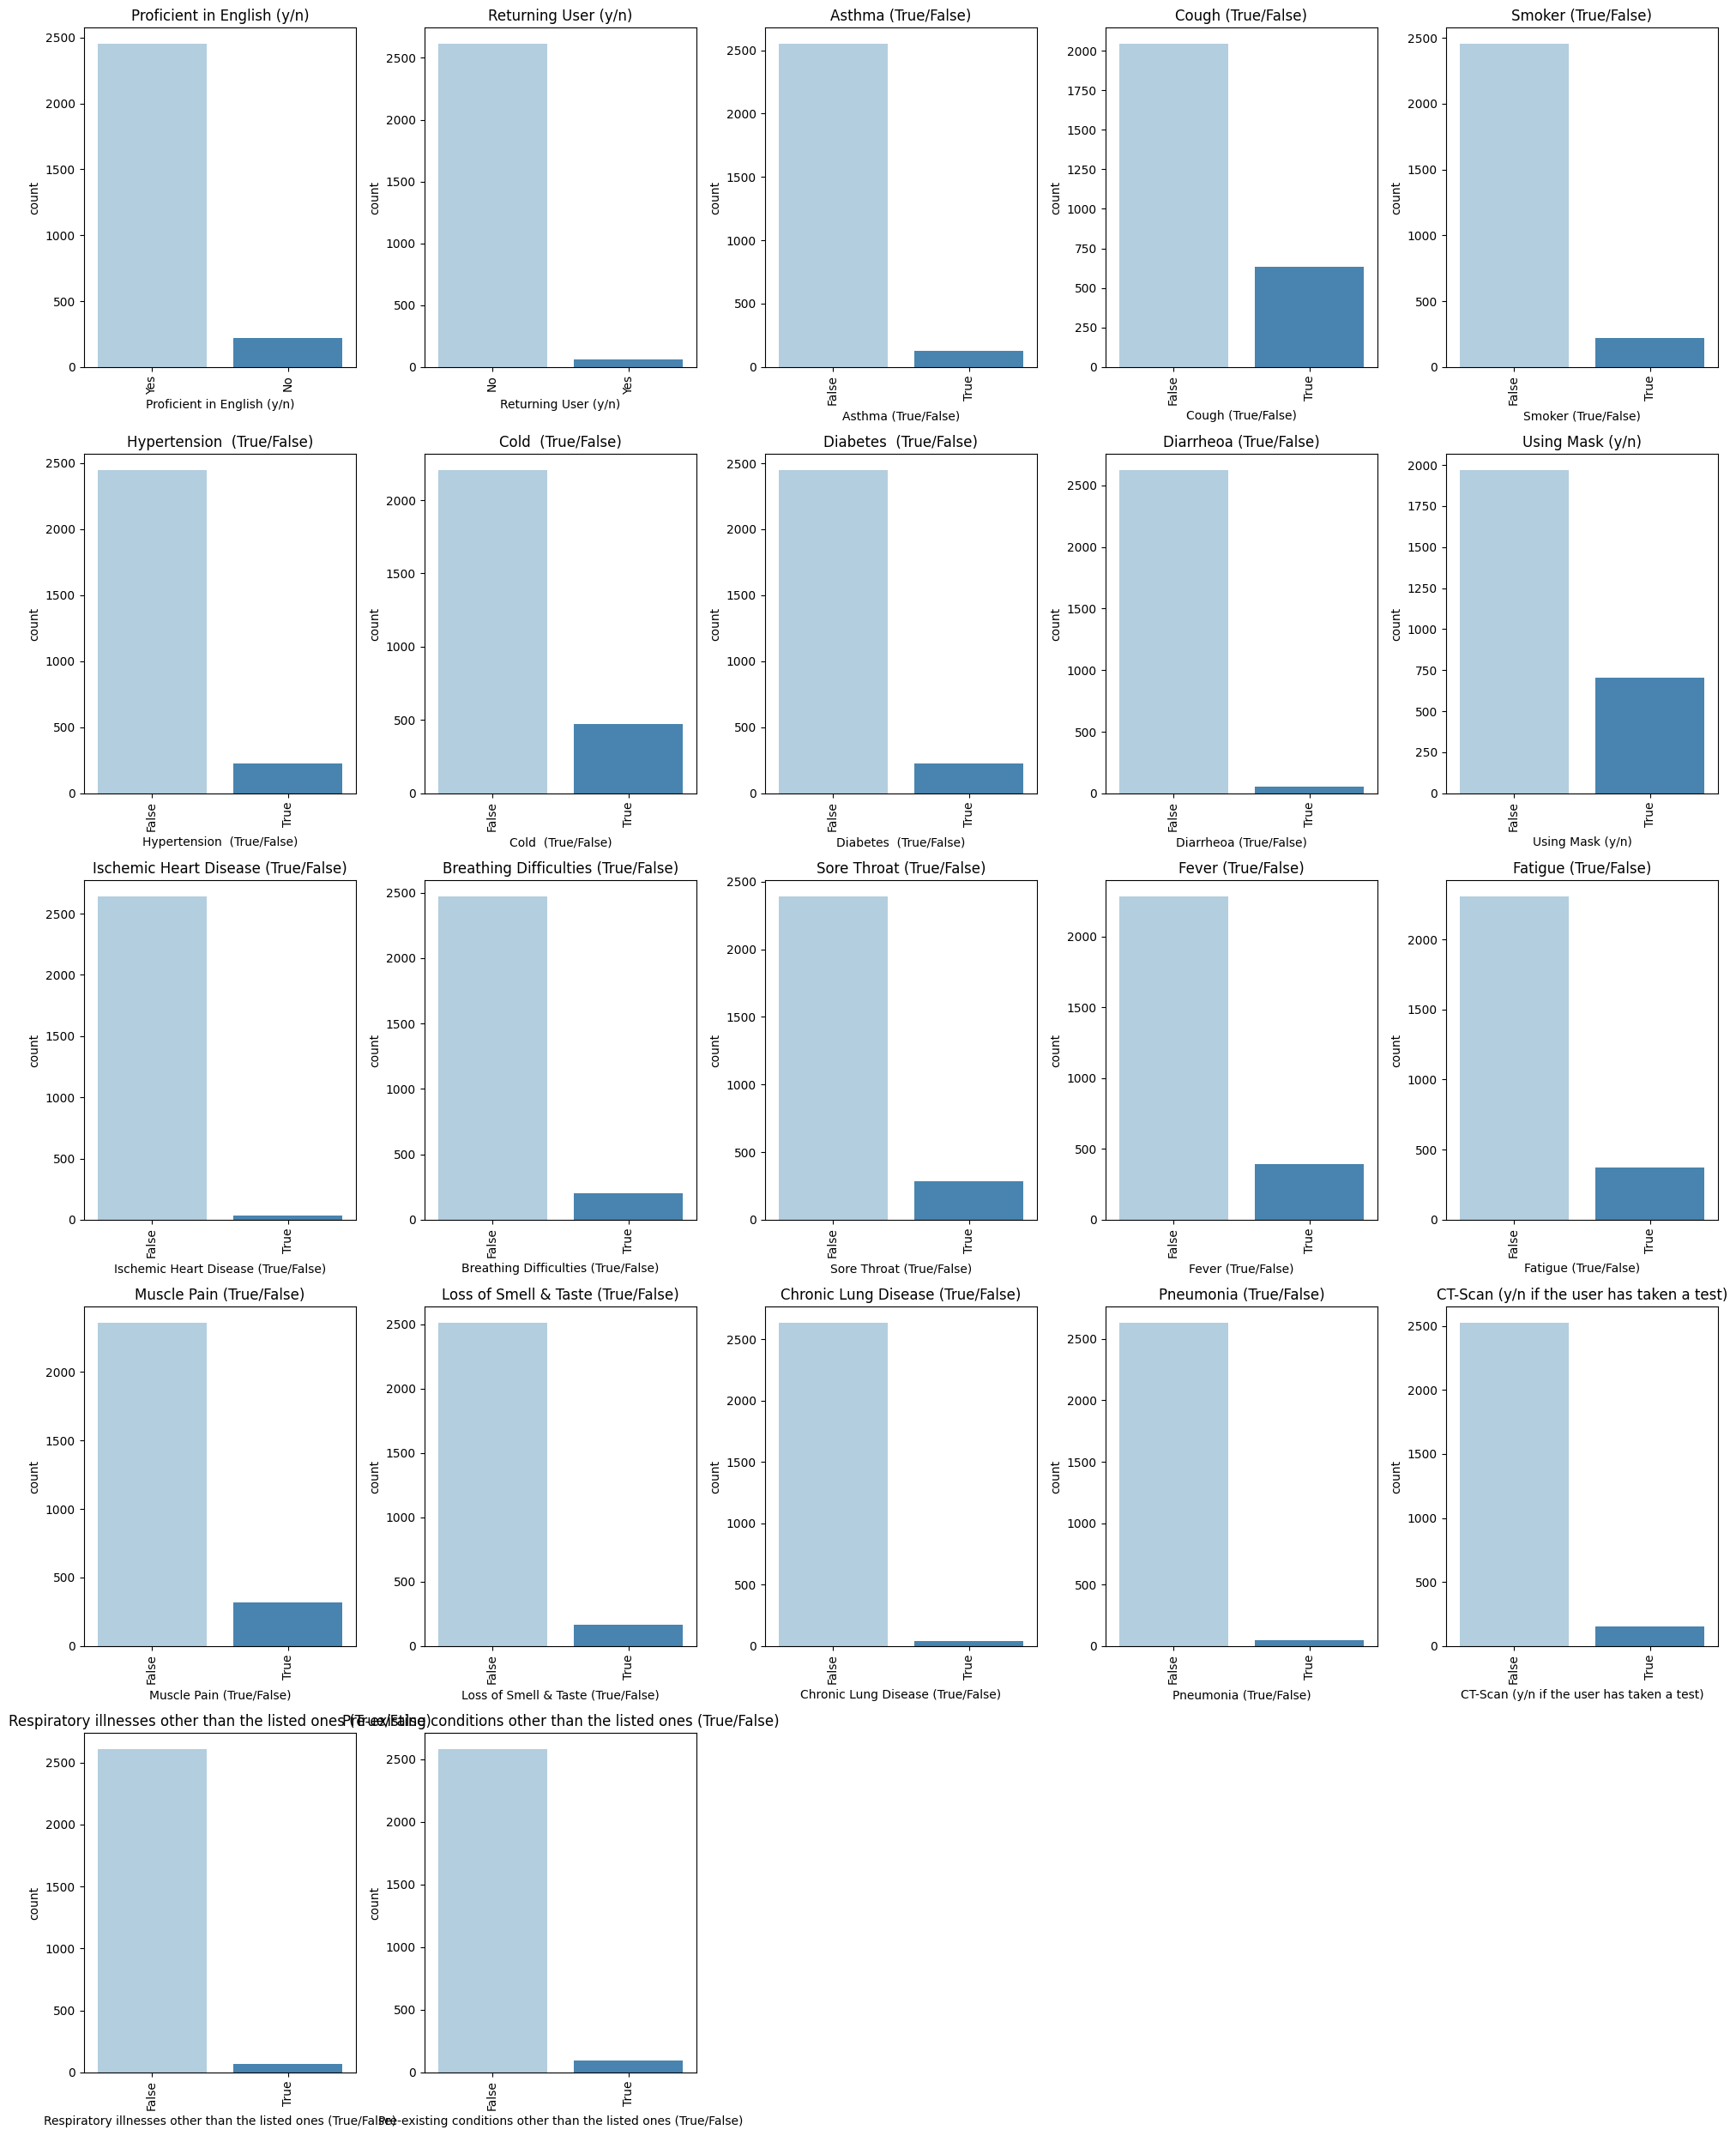

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Identify columns with exactly two unique values
columns_to_plot_filtered = [col for col in columns_to_show if dataframe[col].nunique() == 2]

print(f"Number of columns to plot: {len(columns_to_plot_filtered)}")  # This will print the number of columns with exactly two values

# Calculate the grid size
num_columns = 5
num_rows = math.ceil(len(columns_to_plot_filtered) / num_columns)

# Plotting setup
fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))

# Flatten the axs array for easy indexing if necessary
axs = axs.flatten()

# Iterate over columns to plot
for i, col in enumerate(columns_to_plot_filtered):
    sns.countplot(x=col, data=dataframe, ax=axs[i], palette='Blues')
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(len(columns_to_plot_filtered), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


Number of columns to plot: 5


/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/2904335752.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, ax=axs[i], palette='Blues')
/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/2904335752.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, ax=axs[i], palette='Blues')
/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/2904335752.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, ax=axs[i], palette='Blues')
/

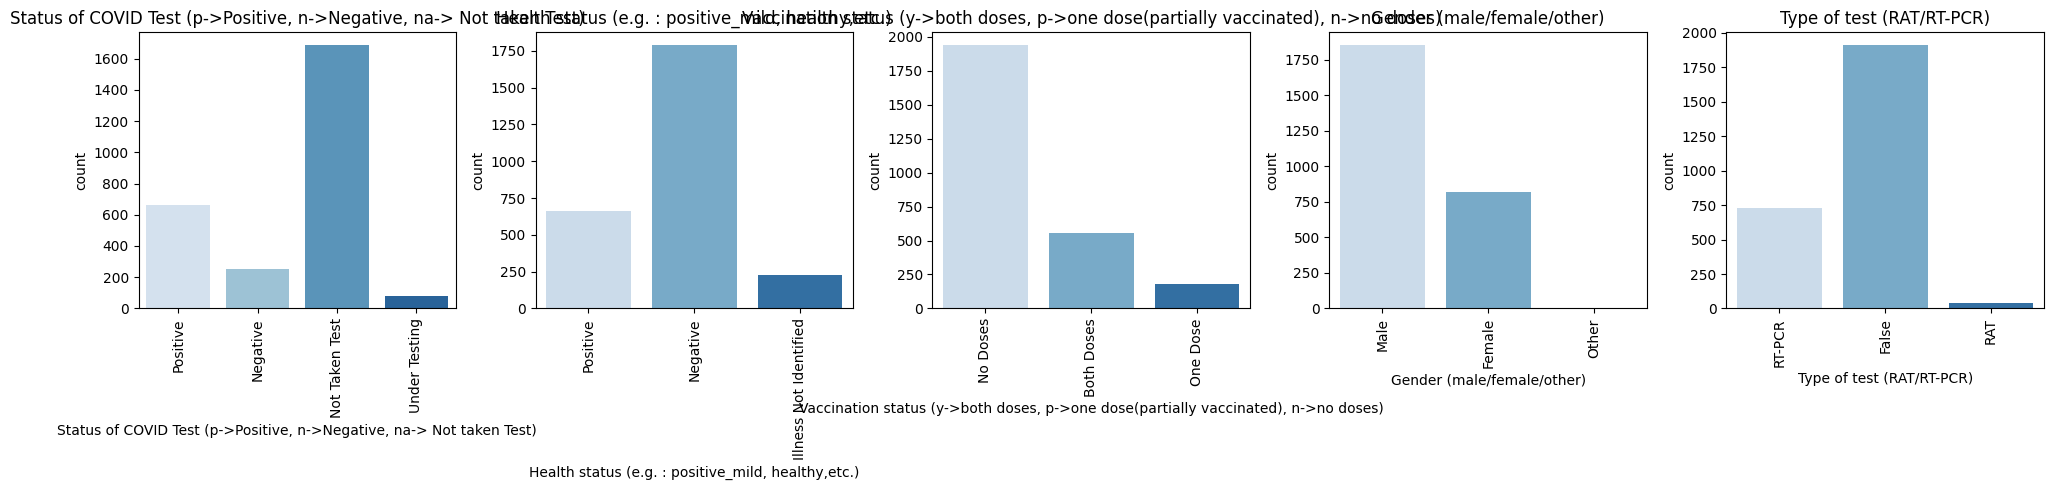

In [29]:
# Identify columns with more than two unique values
columns_to_plot_more_than_two = [col for col in columns_to_show if dataframe[col].nunique() > 2]

print(f"Number of columns to plot: {len(columns_to_plot_more_than_two)}")  # This will print the number of columns with more than two values

# Calculate the grid size
num_columns = 5
num_rows = math.ceil(len(columns_to_plot_more_than_two) / num_columns)

# Plotting setup
fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))

# Flatten the axs array for easy indexing if necessary
axs = axs.flatten()

# Iterate over columns to plot
for i, col in enumerate(columns_to_plot_more_than_two):
    sns.countplot(x=col, data=dataframe, ax=axs[i], palette='Blues')
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(len(columns_to_plot_more_than_two), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


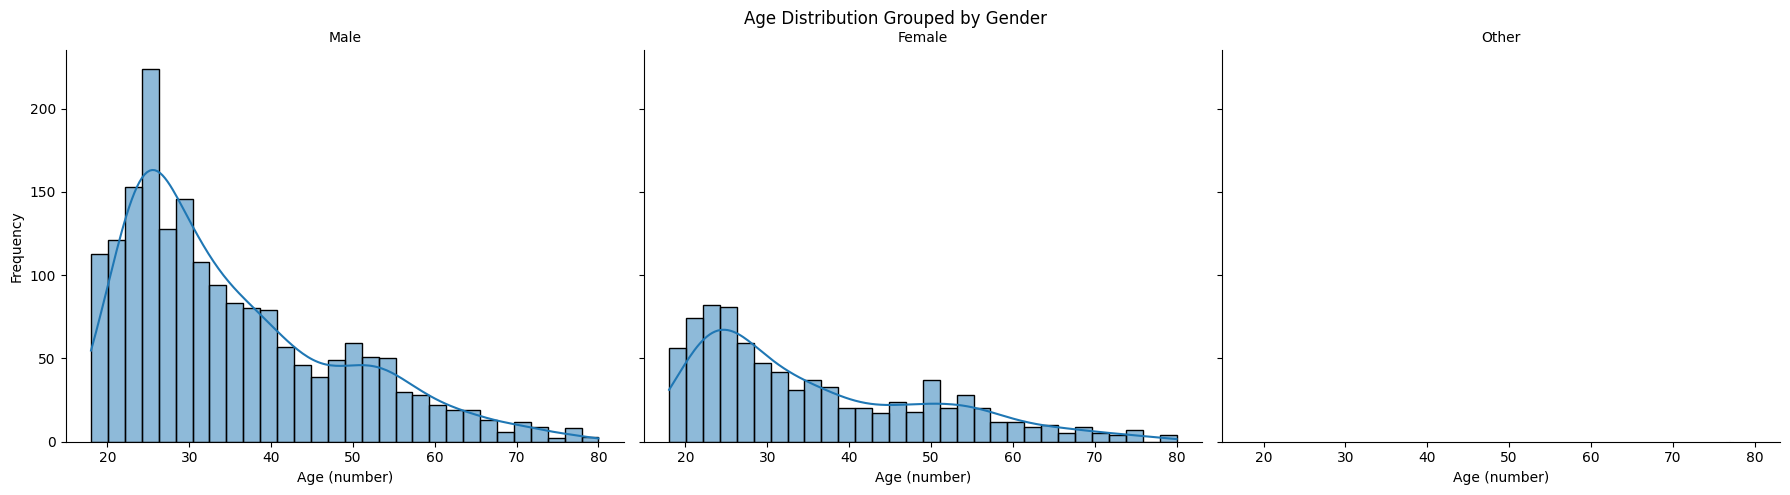

In [30]:
# Plotting histograms grouped by gender using FacetGrid
g = sns.FacetGrid(dataframe, col='Gender (male/female/other)', col_wrap=3, height=5, aspect=1.2)
g.map(sns.histplot, 'Age (number)', bins=30, kde=True)
g.set_axis_labels('Age (number)', 'Frequency')
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution Grouped by Gender')
plt.show()

Number of remaining columns to plot: 7


/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/347127033.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, ax=axs[row, col_pos], palette='Blues')
/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/347127033.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, ax=axs[row, col_pos], palette='Blues')
/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/347127033.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, ax=axs[row

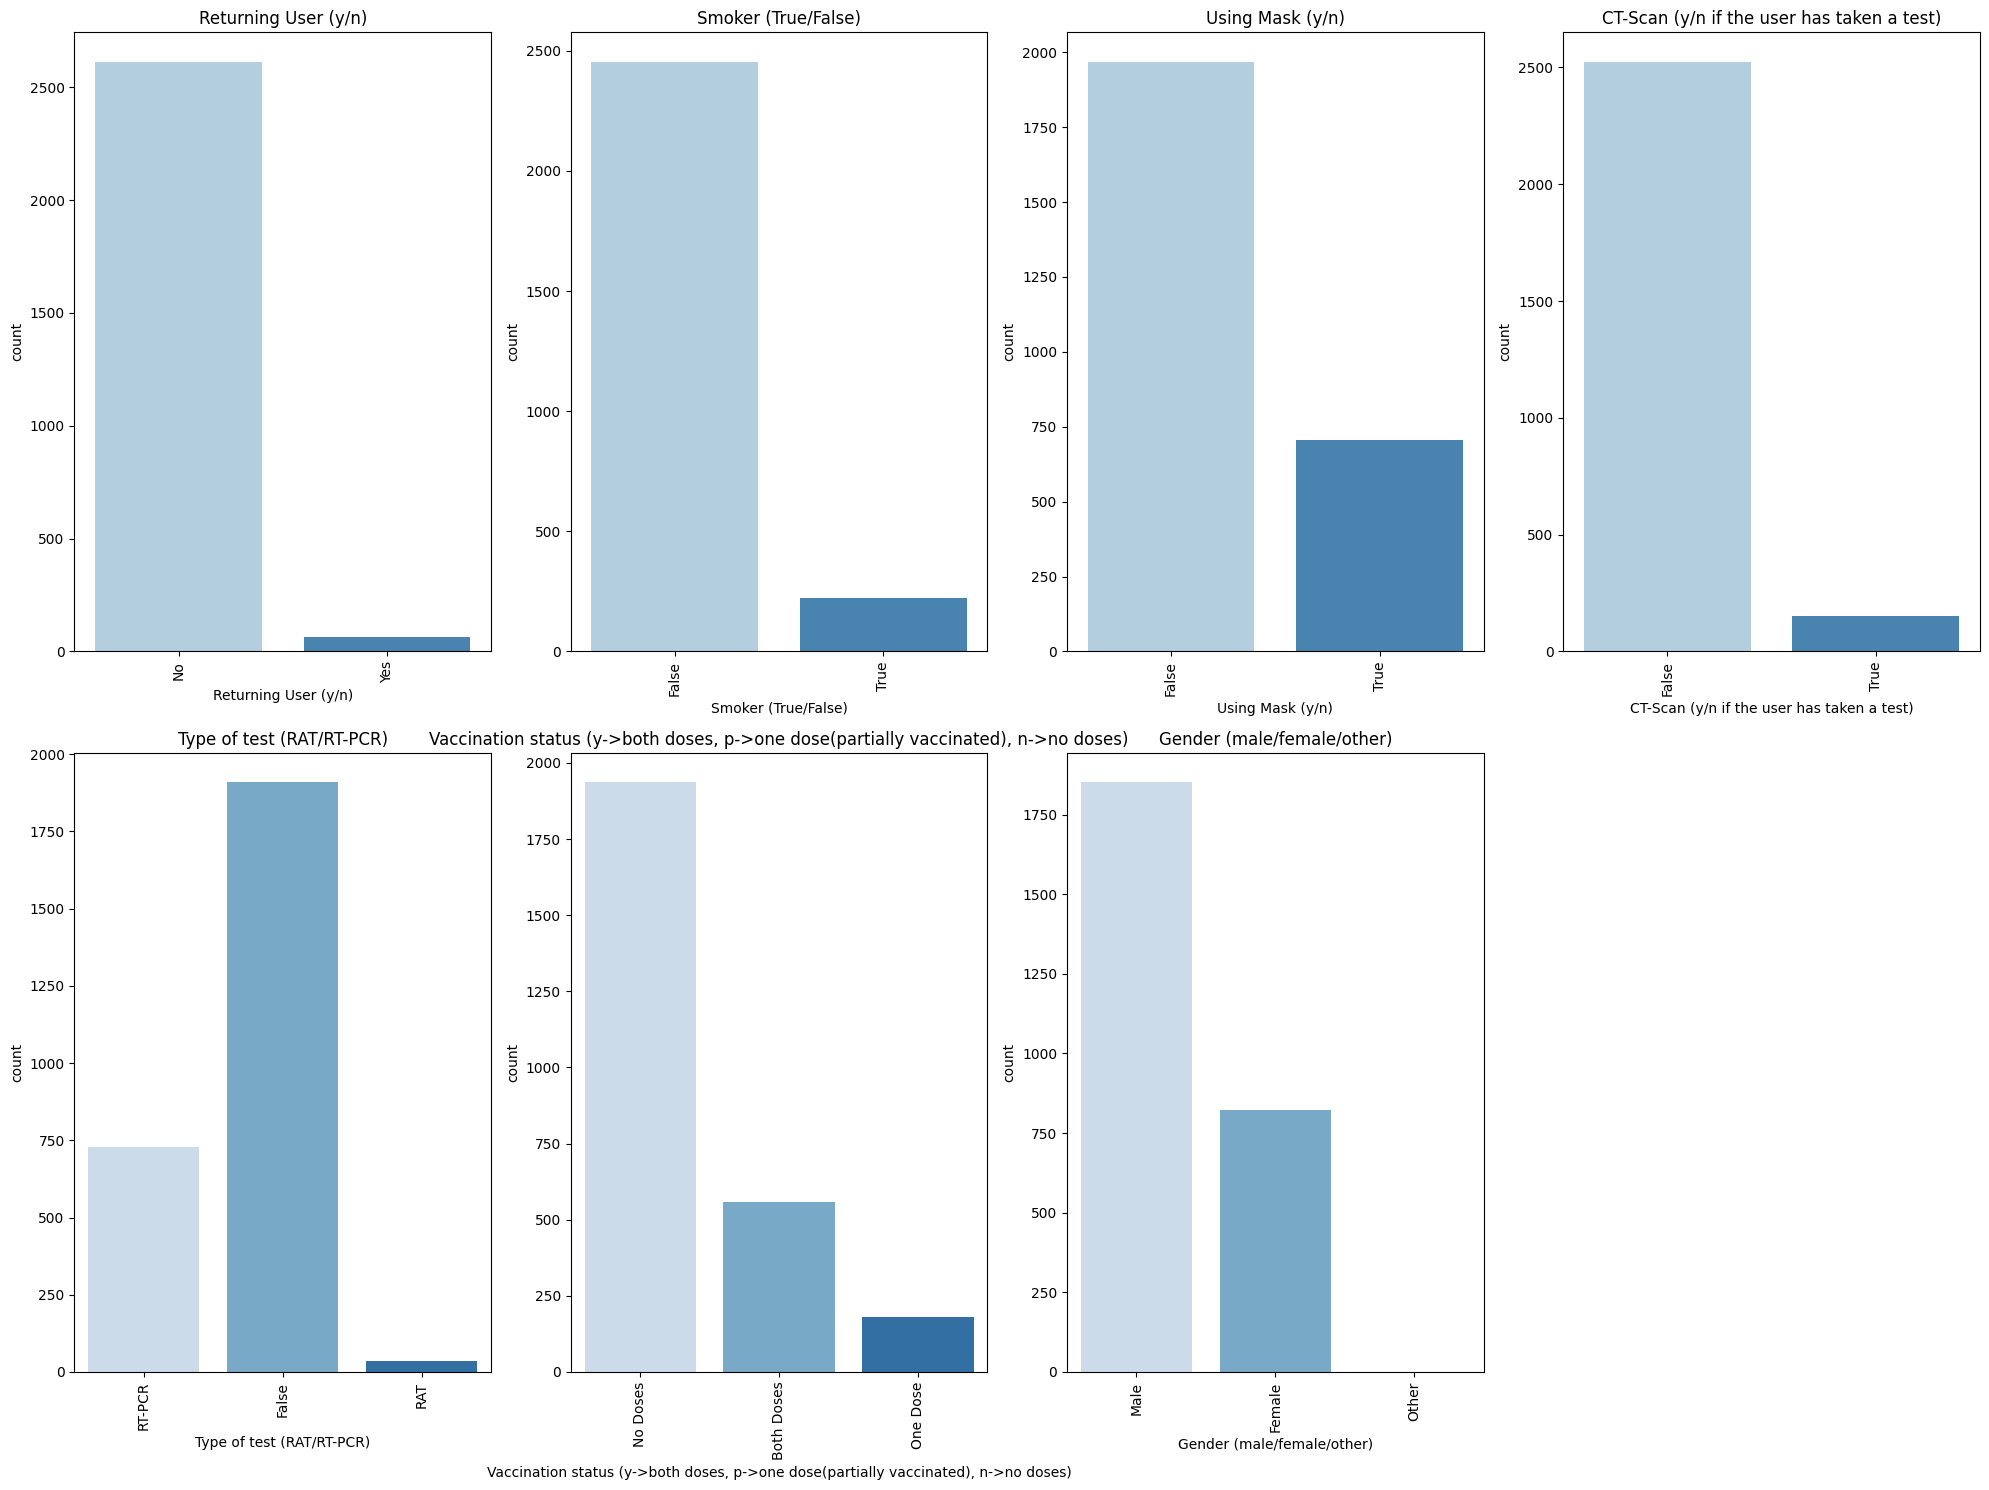

In [31]:
# Specify remaining columns to plot
remaining_columns_to_plot = [
    "Returning User (y/n)",
    "Smoker (True/False)",
    "Using Mask (y/n)",
    "CT-Scan (y/n if the user has taken a test)",
    "Type of test (RAT/RT-PCR)",
    "Vaccination status (y->both doses, p->one dose(partially vaccinated), n->no doses)",
    "Gender (male/female/other)"
]

print(f"Number of remaining columns to plot: {len(remaining_columns_to_plot)}")  # This will print the number of remaining columns

# Plotting setup
fig, axs = plt.subplots(2, 4, figsize=(20, 15))  # 2x4 grid for the remaining columns

# Iterate over remaining columns to plot
for i, col in enumerate(remaining_columns_to_plot):
    row = i // 4
    col_pos = i % 4
    sns.countplot(x=col, data=dataframe, ax=axs[row, col_pos], palette='Blues')
    axs[row, col_pos].set_title(col)
    axs[row, col_pos].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(len(remaining_columns_to_plot), 2*4):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()


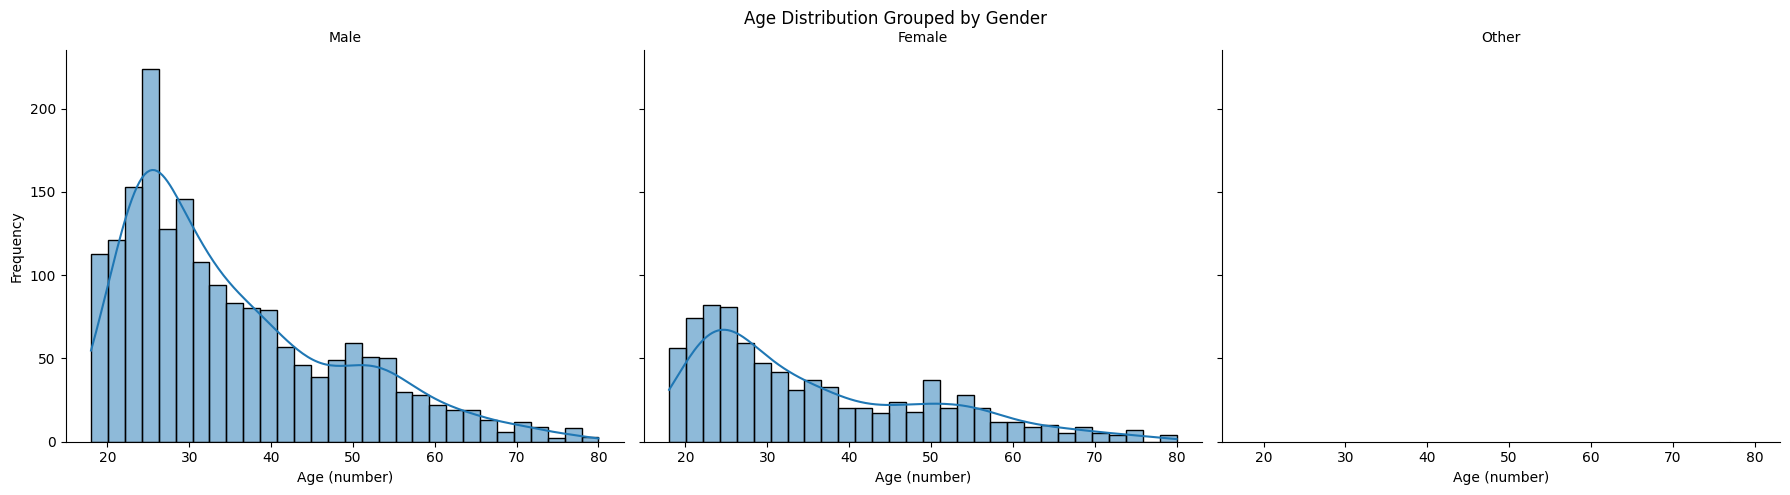

In [32]:
# Plotting histograms grouped by gender using FacetGrid
g = sns.FacetGrid(dataframe, col='Gender (male/female/other)', col_wrap=3, height=5, aspect=1.2)
g.map(sns.histplot, 'Age (number)', bins=30, kde=True)
g.set_axis_labels('Age (number)', 'Frequency')
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution Grouped by Gender')
plt.show()

In [33]:
import pandas as pd
import scipy.stats as stats

# List of categorical columns to test
categorical_columns = columns_to_show

# Initialize an empty list to store significant results
significant_results = []

# Perform chi-square tests for all pairs of categorical variables
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i < j:  # Avoid duplicate tests and self-comparison
            contingency_table = pd.crosstab(dataframe[col1], dataframe[col2])
            observed = contingency_table.values

            # Check if all observed values are >= 10
            add = all(observed_value >= 10 for observed_row in observed for observed_value in observed_row)
            
            if add:
                chi2, p, dof, _ = stats.chi2_contingency(contingency_table)
                if p < 0.05:  # Change significance level as needed
                    significant_results.append({
                        'Variable 1': col1,
                        'Variable 2': col2,
                        'Chi2': chi2,
                        'p-value': p,
                        # 'p-value': format(p, '.10f'),  # Format p-value to 10 decimal places
                        'Degrees of Freedom': dof
                    })

# Convert the list of significant results to a DataFrame
significant_results_df = pd.DataFrame(significant_results)

# Display the significant chi-square test results
significant_results_df.to_csv('chi square.csv')


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

segmented_data = dataframe.groupby(['Status of COVID Test (p->Positive, n->Negative, na-> Not taken Test)', 'Health status (e.g. : positive_mild, healthy,etc.)']).size().unstack(fill_value=0)

print("Segmented Data:")
segmented_data

Segmented Data:


Health status (e.g. : positive_mild, healthy,etc.)  Illness Not Identified  \
Status of COVID Test (p->Positive, n->Negative,...                           
Negative                                                                49   
Not Taken Test                                                         101   
Positive                                                                 0   
Under Testing                                                           80   

Health status (e.g. : positive_mild, healthy,etc.)  Negative  Positive  
Status of COVID Test (p->Positive, n->Negative,...                      
Negative                                                 201         0  
Not Taken Test                                          1492        91  
Positive                                                  93       568  
Under Testing                                              0         0

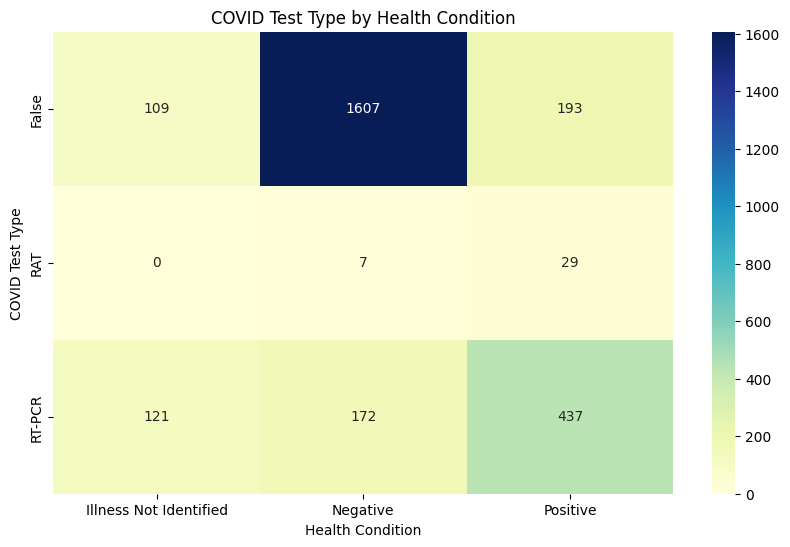

In [35]:
segmented_data = dataframe.groupby(['Type of test (RAT/RT-PCR)', 'Health status (e.g. : positive_mild, healthy,etc.)']).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(segmented_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('COVID Test Type by Health Condition')
plt.xlabel('Health Condition')
plt.ylabel('COVID Test Type')
plt.show()

In [36]:
dataframe.head(5)

User ID  Age (number)  Cold  (True/False)  \
0  9hXEs9OejdVxG6JJGCyKQpqVvy43            67                True   
1  dPi1G2i821MDlbBUQWboTaExz023            24               False   
3  356wSucV0OV6VQMvozjX63pIXrH2            24                True   
4  OPOiHCtB3WXhEdnsofhMpnP8bak1            38               False   
5  XbOUJCUl8GWEpQpIRMvujDE1sTE2            57                True   

  Date when the user recorded and submitted the samples  Cough (True/False)  \
0                                         2021-07-19                   True   
1                                         2021-08-16                  False   
3                                         2021-07-28                   True   
4                                         2021-07-15                  False   
5                                         2021-07-17                   True   

  Health status (e.g. : positive_mild, healthy,etc.) Date of CT-Scan  \
0                                           Positive      2021-07-17   
1                                           Negative           False   
3                                           Negative           False   
4                                           Negative      2021-07-07   
5                                           Positive      2021-07-15   

   CT-Scan (y/n if the user has taken a test) CT-Score   dT  ...  \
0                                        True      6.0  web  ...   
1                                       False    False  web  ...   
3                                       False    False  web  ...   
4                                        True      8.0  web  ...   
5                                        True      9.0  web  ...   

   spectral_contrast_6_cough_heavy_cough_heavy  \
0                                     31.03838   
1                                          NaN   
3                                          NaN   
4                                          NaN   
5                                          NaN   

   duration_cough_heavy_cough_heavy duration_cough_shallow  \
0                          3.626667               3.989333   
1                         10.090667               9.557333   
3                          9.194667               6.602667   
4                          1.514667               2.570667   
5                          2.090667               2.442667   

   duration_counting_fast  duration_counting_normal duration_breathing_deep  \
0                9.034667                  8.085333                7.317333   
1                9.077333                 18.538667               16.341333   
3                6.304000                 16.320000               24.640000   
4                4.618667                 12.586667                9.728000   
5                5.525333                  8.970667                9.824000   

   duration_breathing_shallow duration_vowel_a duration_vowel_e  \
0                    5.301333         4.021333         4.416000   
1                   11.093333        29.941333        28.981333   
3                   14.293333        15.381333        17.834667   
4                    9.418667         8.522667        11.093333   
5                    6.154667         4.618667         5.888000   

  duration_vowel_o  
0         4.448000  
1        28.576000  
3        12.021333  
4        10.506667  
5         8.202667  

[5 rows x 299 columns]

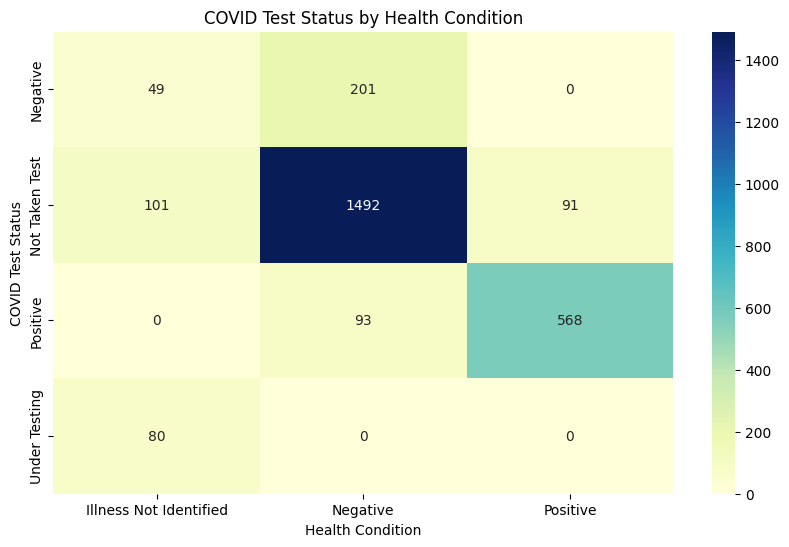

In [37]:
segmented_data = dataframe.groupby(['Status of COVID Test (p->Positive, n->Negative, na-> Not taken Test)', 'Health status (e.g. : positive_mild, healthy,etc.)']).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(segmented_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('COVID Test Status by Health Condition')
plt.xlabel('Health Condition')
plt.ylabel('COVID Test Status')
plt.show()

In [38]:
true_false_columns = [
    # "Asthma (True/False)", 
    "Cough (True/False)",
      "Smoker (True/False)",
    # "Hypertension  (True/False)",
      "Cold  (True/False)",
        # "Diabetes  (True/False)",
    # "Diarrheoa (True/False)",
    #   "Ischemic Heart Disease (True/False)", 
    "Breathing Difficulties (True/False)",
      "Sore Throat (True/False)", 
    # "Fever (True/False)",
    #   "Fatigue (True/False)",
        # "Muscle Pain (True/False)",
    "Loss of Smell & Taste (True/False)", 
    "Chronic Lung Disease (True/False)",
    "Pneumonia (True/False)", 
    "Respiratory illnesses other than the listed ones (True/False)",
    "Pre-existing conditions other than the listed ones (True/False)"
]

# Creating the filter for all true/false columns to be False
filter_condition = (dataframe[true_false_columns] == False).all(axis=1)

# Creating the new dataframe with the filter applied
new_dataframe = dataframe[filter_condition]

# Print the new dataframe
new_dataframe['Gender (male/female/other)'].value_counts()


Gender (male/female/other)
Male      1138
Female     465
Name: count, dtype: int64

In [39]:
age_bins = [18, 41, 61, 81]
age_labels = ['18-40', '41-60', '61-80']
new_dataframe['Age Group'] = pd.cut(new_dataframe['Age (number)'], bins=age_bins, labels=age_labels, right=False)

/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/1520864951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['Age Group'] = pd.cut(new_dataframe['Age (number)'], bins=age_bins, labels=age_labels, right=False)


In [40]:
male_dataframe = new_dataframe.loc[new_dataframe['Gender (male/female/other)']=='Male']
female_dataframe = new_dataframe.loc[new_dataframe['Gender (male/female/other)']=='Female']

<Axes: xlabel='Age Group', ylabel='Count'>

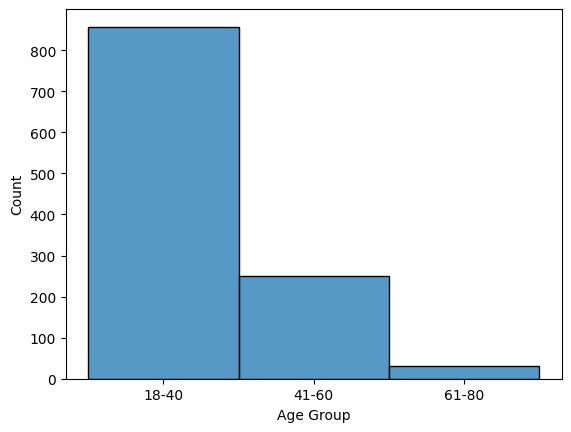

In [41]:
sns.histplot(male_dataframe['Age Group'])
#for male

<Axes: xlabel='Age Group', ylabel='Count'>

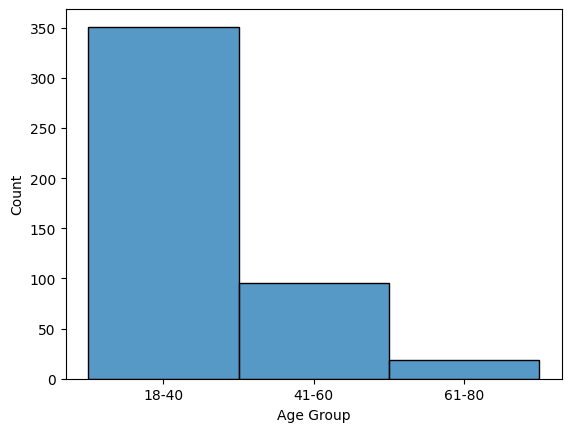

In [42]:
sns.histplot(female_dataframe['Age Group'])


In [28]:
data = pd.read_csv('/Users/manraj/Desktop/Coswara-Data/Extracted_Audio_CSV/NewData with audio duration.csv')

In [29]:
data.describe()

Unnamed: 0  Age (number)      fV      QUALITY  \
count  2675.000000   2675.000000  2009.0  2674.000000   
mean   1370.179065     35.420187     2.0     1.752431   
std     794.430652     13.471204     0.0     0.563283   
min       0.000000     18.000000     2.0     0.000000   
25%     679.500000     25.000000     2.0     2.000000   
50%    1364.000000     31.000000     2.0     2.000000   
75%    2057.500000     44.000000     2.0     2.000000   
max    2745.000000     80.000000     2.0     2.000000   

        QUALITY_vowel-o_labels   QUALITY_counting-fast_labels  \
count              2674.000000                    2675.000000   
mean                  1.554974                       1.696075   
std                   0.696960                       0.628395   
min                   0.000000                       0.000000   
25%                   1.000000                       2.000000   
50%                   2.000000                       2.000000   
75%                   2.000000                       2.000000   
max                   2.000000                       2.000000   

        QUALITY_vowel-e_labels   QUALITY_breathing-deep_labels  \
count              2675.000000                     2675.000000   
mean                  1.695327                        1.554766   
std                   0.632778                        0.756109   
min                   0.000000                        0.000000   
25%                   2.000000                        1.000000   
50%                   2.000000                        2.000000   
75%                   2.000000                        2.000000   
max                   2.000000                        2.000000   

        QUALITY_breathing-shallow_labels   QUALITY_counting-normal_labels  \
count                        2675.000000                       2675.00000   
mean                            1.528972                          1.75028   
std                             0.766371                          0.59642   
min                             0.000000                          0.00000   
25%                             1.000000                          2.00000   
50%                             2.000000                          2.00000   
75%                             2.000000                          2.00000   
max                             2.000000                          2.00000   

        QUALITY_cough-heavy_labels   QUALITY_vowel-a_labels  \
count                  2675.000000              2675.000000   
mean                      1.773458                 1.669159   
std                       0.569321                 0.647244   
min                       0.000000                 0.000000   
25%                       2.000000                 2.000000   
50%                       2.000000                 2.000000   
75%                       2.000000                 2.000000   
max                       2.000000                 2.000000   

       chroma_0_cough_heavy  chroma_1_cough_heavy  chroma_2_cough_heavy  \
count           2632.000000           2632.000000           2632.000000   
mean               0.410903              0.411760              0.412853   
std                0.122562              0.122432              0.123425   
min                0.000000              0.000000              0.000000   
25%                0.340274              0.343007              0.345808   
50%                0.417040              0.417606              0.418820   
75%                0.493154              0.489756              0.489302   
max                0.895442              0.831843              1.000000   

       chroma_3_cough_heavy  chroma_4_cough_heavy  chroma_5_cough_heavy  \
count           2632.000000           2632.000000           2632.000000   
mean               0.413365              0.416948              0.417709   
std                0.121019              0.121102              0.122383   
min                0.000000              0.000000              0.000000   


In [30]:
for cols in data.columns:
    print(cols)

Unnamed: 0
User ID
Age (number)
Cold  (True/False)
Date when the user recorded and submitted the samples
Cough (True/False)
Health status (e.g. : positive_mild, healthy,etc.)
Date of CT-Scan
CT-Scan (y/n if the user has taken a test)
CT-Score
dT
Diabetes  (True/False)
Diarrheoa (True/False)
Proficient in English (y/n)
fV
Fever (True/False)
Gender (male/female/other)
Hypertension  (True/False)
Country
Locality
State
Loss of Smell & Taste (True/False)
Muscle Pain (True/False)
Returning User (y/n)
Smoker (True/False)
Type of test (RAT/RT-PCR)
Date of COVID Test (if taken)
Status of COVID Test (p->Positive, n->Negative, na-> Not taken Test)
Using Mask (y/n)
Vaccination status (y->both doses, p->one dose(partially vaccinated), n->no doses)
Breathing Difficulties (True/False)
Respiratory illnesses other than the listed ones (True/False)
Fatigue (True/False)
Sore Throat (True/False)
Ischemic Heart Disease (True/False)
Asthma (True/False)
Pre-existing conditions other than the listed ones (Tru

In [31]:
column_mapping = {
    'Unnamed: 0': 'index',
    'User ID': 'user_id',
    'Age (number)': 'age',
    'Cold  (True/False)': 'cold',
    'Date when the user recorded and submitted the samples': 'sample_date',
    'Cough (True/False)': 'cough',
    'Health status (e.g. : positive_mild, healthy,etc.)': 'health_status',
    'Date of CT-Scan': 'ct_scan_date',
    'CT-Scan (y/n if the user has taken a test)': 'ct_scan',
    'CT-Score': 'ct_score',
    'dT': 'dt',
    'Diabetes  (True/False)': 'diabetes',
    'Diarrheoa (True/False)': 'diarrhea',
    'Proficient in English (y/n)': 'english_proficient',
    'fV': 'fv',
    'Fever (True/False)': 'fever',
    'Gender (male/female/other)': 'gender',
    'Hypertension  (True/False)': 'hypertension',
    'Country': 'country',
    'Locality': 'locality',
    'State': 'state',
    'Loss of Smell & Taste (True/False)': 'loss_of_smell_taste',
    'Muscle Pain (True/False)': 'muscle_pain',
    'Returning User (y/n)': 'returning_user',
    'Smoker (True/False)': 'smoker',
    'Type of test (RAT/RT-PCR)': 'test_type',
    'Date of COVID Test (if taken)': 'covid_test_date',
    'Status of COVID Test (p->Positive, n->Negative, na-> Not taken Test)': 'covid_test_status',
    'Using Mask (y/n)': 'mask_usage',
    'Vaccination status (y->both doses, p->one dose(partially vaccinated), n->no doses)': 'vaccination_status',
    'Breathing Difficulties (True/False)': 'breathing_difficulties',
    'Respiratory illnesses other than the listed ones (True/False)': 'other_respiratory_illnesses',
    'Fatigue (True/False)': 'fatigue',
    'Sore Throat (True/False)': 'sore_throat',
    'Ischemic Heart Disease (True/False)': 'ischemic_heart_disease',
    'Asthma (True/False)': 'asthma',
    'Pre-existing conditions other than the listed ones (True/False)': 'other_preexisting_conditions',
    'Chronic Lung Disease (True/False)': 'chronic_lung_disease',
    'Pneumonia (True/False)': 'pneumonia',
    'iF': 'if',
    'date': 'date',
    'test': 'test',
}

data = data.rename(columns=column_mapping)

In [80]:
health_status_male_duration_breathing_deep = data[['health_status','duration_breathing_deep']]

In [33]:
health_status_male_duration_breathing_deep.dropna(inplace=True)

/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_1025/3849379934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_status_male_duration_breathing_deep.dropna(inplace=True)


In [34]:
health_status_male_duration_breathing_deep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2636 entries, 0 to 2674
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   health_status            2636 non-null   object 
 1   duration_breathing_deep  2636 non-null   float64
dtypes: float64(1), object(1)
memory usage: 61.8+ KB


In [35]:
health_status_male_duration_breathing_deep['health_status'].value_counts()

health_status
Negative                  1759
Positive                   655
Illness Not Identified     222
Name: count, dtype: int64

In [36]:
health_status_male_duration_breathing_deep = health_status_male_duration_breathing_deep.loc[health_status_male_duration_breathing_deep['health_status']!='Illness Not Identified']

In [37]:
health_status_male_duration_breathing_deep['health_status'].value_counts()

health_status
Negative    1759
Positive     655
Name: count, dtype: int64

In [38]:
health_status_male_duration_breathing_deep.describe()

duration_breathing_deep
count              2414.000000
mean                 15.545394
std                   6.552426
min                   0.032000
25%                  11.136000
50%                  15.008000
75%                  19.634667
max                  30.000181

<Axes: xlabel='duration_breathing_deep', ylabel='Count'>

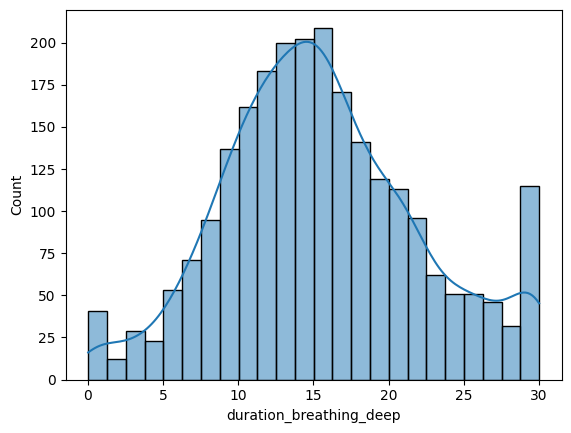

In [39]:
sns.histplot(data=health_status_male_duration_breathing_deep,x='duration_breathing_deep',kde=True)

<Axes: >

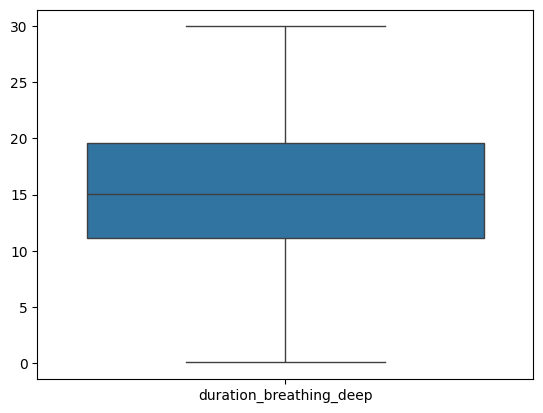

In [40]:
sns.boxplot(data=health_status_male_duration_breathing_deep)

In [41]:
health_status_male_duration_breathing_deep=health_status_male_duration_breathing_deep.loc[health_status_male_duration_breathing_deep['duration_breathing_deep']>8]

In [42]:
health_status_male_duration_breathing_deep.describe()

duration_breathing_deep
count              2157.000000
mean                 16.815529
std                   5.671262
min                   8.010667
25%                  12.458667
50%                  15.701333
75%                  20.245333
max                  30.000181

In [43]:
# health_status_male_duration_breathing_deep = health_status_male_duration_breathing_deep.loc[health_status_male_duration_breathing_deep['Health status (e.g. : positive_mild, healthy,etc.)'] != 'Illness Not Identified']
# health_status_male_duration_breathing_deep.head(5)

In [44]:
group1 = health_status_male_duration_breathing_deep.loc[health_status_male_duration_breathing_deep['health_status'] != 'Positive']
group2 = health_status_male_duration_breathing_deep.loc[health_status_male_duration_breathing_deep['health_status'] != 'Negative']

In [45]:
group1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1601 entries, 1 to 2674
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   health_status            1601 non-null   object 
 1   duration_breathing_deep  1601 non-null   float64
dtypes: float64(1), object(1)
memory usage: 37.5+ KB


In [46]:
group2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 4 to 2672
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   health_status            556 non-null    object 
 1   duration_breathing_deep  556 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


In [47]:
from scipy.stats import ttest_ind

In [48]:
ttest_ind(group1['duration_breathing_deep'], group2['duration_breathing_deep'],equal_var=False)

TtestResult(statistic=7.4162540455125825, pvalue=2.51167526829736e-13, df=1030.3884349758177)

In [49]:
age_bins = [18, 41, 61, 81]
age_labels = ['18-40', '41-60', '61-80']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

In [50]:
data.describe()

index          age      fv      QUALITY   QUALITY_vowel-o_labels  \
count  2675.000000  2675.000000  2009.0  2674.000000              2674.000000   
mean   1370.179065    35.420187     2.0     1.752431                 1.554974   
std     794.430652    13.471204     0.0     0.563283                 0.696960   
min       0.000000    18.000000     2.0     0.000000                 0.000000   
25%     679.500000    25.000000     2.0     2.000000                 1.000000   
50%    1364.000000    31.000000     2.0     2.000000                 2.000000   
75%    2057.500000    44.000000     2.0     2.000000                 2.000000   
max    2745.000000    80.000000     2.0     2.000000                 2.000000   

        QUALITY_counting-fast_labels   QUALITY_vowel-e_labels  \
count                    2675.000000              2675.000000   
mean                        1.696075                 1.695327   
std                         0.628395                 0.632778   
min                         0.000000                 0.000000   
25%                         2.000000                 2.000000   
50%                         2.000000                 2.000000   
75%                         2.000000                 2.000000   
max                         2.000000                 2.000000   

        QUALITY_breathing-deep_labels   QUALITY_breathing-shallow_labels  \
count                     2675.000000                        2675.000000   
mean                         1.554766                           1.528972   
std                          0.756109                           0.766371   
min                          0.000000                           0.000000   
25%                          1.000000                           1.000000   
50%                          2.000000                           2.000000   
75%                          2.000000                           2.000000   
max                          2.000000                           2.000000   

        QUALITY_counting-normal_labels   QUALITY_cough-heavy_labels  \
count                       2675.00000                  2675.000000   
mean                           1.75028                     1.773458   
std                            0.59642                     0.569321   
min                            0.00000                     0.000000   
25%                            2.00000                     2.000000   
50%                            2.00000                     2.000000   
75%                            2.00000                     2.000000   
max                            2.00000                     2.000000   

        QUALITY_vowel-a_labels  chroma_0_cough_heavy  chroma_1_cough_heavy  \
count              2675.000000           2632.000000           2632.000000   
mean                  1.669159              0.410903              0.411760   
std                   0.647244              0.122562              0.122432   
min                   0.000000              0.000000              0.000000   
25%                   2.000000              0.340274              0.343007   
50%                   2.000000              0.417040              0.417606   
75%                   2.000000              0.493154              0.489756   
max                   2.000000              0.895442              0.831843   

       chroma_2_cough_heavy  chroma_3_cough_heavy  chroma_4_cough_heavy  \
count           2632.000000           2632.000000           2632.000000   
mean               0.412853              0.413365              0.416948   
std                0.123425              0.121019              0.121102   
min                0.000000              0.000000              0.000000   
25%                0.345808              0.346763              0.350724   
50%                0.418820              0.421283              0.424427   
75%                0.489302              0.490234              0.496721   
max                1.000000              0.915384              0.8307

In [26]:
data.groupby(['gender','health_status','age_group']).describe()

/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_1025/887645941.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['gender','health_status','age_group']).describe()


index                            \
                                         count         mean          std   
gender health_status          age_group                                    
Female Illness Not Identified 18-40       43.0  1819.604651   657.270733   
                              41-60       19.0  1636.894737   636.756529   
                              61-80        5.0  1212.400000   893.622012   
       Negative               18-40      373.0  1338.005362   798.577091   
                              41-60      108.0  1387.509259   779.848470   
                              61-80       17.0  1296.176471   800.351035   
       Positive               18-40      146.0  1363.410959   690.955477   
                              41-60       78.0  1375.910256   826.725401   
                              61-80       34.0  1449.647059  1022.189862   
Male   Illness Not Identified 18-40      116.0  1652.715517   758.451097   
                              41-60       29.0  1550.344828   829.191356   
                              61-80       18.0  2043.000000   906.116276   
       Negative               18-40      968.0  1335.842975   798.530103   
                              41-60      284.0  1211.197183   803.032087   
                              61-80       36.0  1320.388889   818.590924   
       Positive               18-40      245.0  1418.183673   723.946269   
                              41-60      113.0  1402.672566   788.218385   
                              61-80       42.0  1374.785714   888.401457   
Other  Positive               61-80        1.0  1437.000000          NaN   

                                                                           \
                                            min      25%     50%      75%   
gender health_status          age_group                                     
Female Illness Not Identified 18-40       191.0  1508.50  1931.0  2202.00   
                              41-60       563.0  1173.00  1478.0  2021.50   
                              61-80        36.0   788.00  1045.0  1957.00   
       Negative               18-40        16.0   609.00  1346.0  2032.00   
                              41-60        76.0   679.25  1418.5  2059.75   
                              61-80       473.0   690.00   889.0  1914.00   
       Positive               18-40        30.0   912.50  1151.0  1986.00   
                              41-60         5.0   780.75  1257.5  1982.50   
                              61-80         8.0   762.00   980.0  2618.50   
Male   Illness Not Identified 18-40        33.0  1412.00  1903.5  2115.25   
                              41-60       209.0   843.00  1517.0  2099.00   
                              61-80        24.0  1040.50  2694.5  2711.75   
       Negative               18-40         1.0   545.75  1415.5  2154.25   
                              41-60        60.0   510.25  1194.0  1753.50   
                              61-80        83.0   622.50  1249.0  2109.75   
       Positive               18-40         9.0   924.00  1188.0  2008.00   
                              41-60         6.0   798.00  1327.0  2034.00   
                              61-80         0.0   773.75  1118.5  2054.00   
Other  Positive               61-80      1437.0  1437.00  1437.0  1437.00   

                                                   age                       \
                                            max  count       mean       std   
gender health_status          age_group                                       
Female Illness Not Identified 18-40      2714.0   43.0  28.860465  6.833327   
                              41-60      2710.0   19.0  49.052632  6.328715   
                              61-80      2236.0    5.0  65.800000  4.438468   
       Negative               18-40      2744.0  373.0  27.064343  5.540286   
                              41-60      2724.0  108.0  49.305556  5.325759   
                              61-80      

In [ ]:
# segmented_data = dataframe.groupby(['Status of COVID Test (p->Positive, n->Negative, na-> Not taken Test)', 'Health status (e.g. : positive_mild, healthy,etc.)']).size().unstack(fill_value=0)

# # Heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(segmented_data, annot=True, cmap='YlGnBu', fmt='d')
# plt.title('COVID Test Status by Health Condition')
# plt.xlabel('Health Condition')
# plt.ylabel('COVID Test Status')
# plt.show()

In [70]:
data_male = data.loc[data['gender']=='Male']
data_female = data.loc[data['gender']=='Female']

In [71]:
data_male.describe()

index          age      fv      QUALITY   QUALITY_vowel-o_labels  \
count  1851.000000  1851.000000  1336.0  1850.000000              1850.000000   
mean   1362.375473    35.213938     2.0     1.764865                 1.568649   
std     798.333967    13.055542     0.0     0.552646                 0.682700   
min       0.000000    18.000000     2.0     0.000000                 0.000000   
25%     630.000000    25.000000     2.0     2.000000                 1.000000   
50%    1374.000000    31.000000     2.0     2.000000                 2.000000   
75%    2079.500000    43.000000     2.0     2.000000                 2.000000   
max    2745.000000    80.000000     2.0     2.000000                 2.000000   

        QUALITY_counting-fast_labels   QUALITY_vowel-e_labels  \
count                    1851.000000              1851.000000   
mean                        1.694219                 1.704484   
std                         0.629426                 0.623570   
min                         0.000000                 0.000000   
25%                         2.000000                 2.000000   
50%                         2.000000                 2.000000   
75%                         2.000000                 2.000000   
max                         2.000000                 2.000000   

        QUALITY_breathing-deep_labels   QUALITY_breathing-shallow_labels  \
count                     1851.000000                        1851.000000   
mean                         1.589411                           1.571043   
std                          0.732250                           0.736466   
min                          0.000000                           0.000000   
25%                          1.000000                           1.000000   
50%                          2.000000                           2.000000   
75%                          2.000000                           2.000000   
max                          2.000000                           2.000000   

        QUALITY_counting-normal_labels   QUALITY_cough-heavy_labels  \
count                      1851.000000                  1851.000000   
mean                          1.753106                     1.774716   
std                           0.588250                     0.566190   
min                           0.000000                     0.000000   
25%                           2.000000                     2.000000   
50%                           2.000000                     2.000000   
75%                           2.000000                     2.000000   
max                           2.000000                     2.000000   

        QUALITY_vowel-a_labels  chroma_0_cough_heavy  chroma_1_cough_heavy  \
count              1851.000000           1819.000000           1819.000000   
mean                  1.685575              0.409908              0.411938   
std                   0.633738              0.121153              0.120927   
min                   0.000000              0.000000              0.000000   
25%                   2.000000              0.340232              0.345440   
50%                   2.000000              0.415603              0.417741   
75%                   2.000000              0.490558              0.488591   
max                   2.000000              0.895442              0.831843   

       chroma_2_cough_heavy  chroma_3_cough_heavy  chroma_4_cough_heavy  \
count           1819.000000           1819.000000           1819.000000   
mean               0.414211              0.416278              0.422501   
std                0.120967              0.119775              0.121125   
min                0.000000              0.000000              0.000000   
25%                0.348969              0.352644              0.354963   
50%                0.421504              0.424201              0.430083   
75%                0.488585              0.490637              0.503917   
max                0.893586              0.832329              0.8307

In [72]:
data_female.describe()

index         age     fv     QUALITY   QUALITY_vowel-o_labels  \
count   823.000000  823.000000  672.0  823.000000               823.000000   
mean   1387.648846   35.833536    2.0    1.726610                 1.526124   
std     786.266709   14.295465    0.0    0.583103                 0.725943   
min       5.000000   18.000000    2.0    0.000000                 0.000000   
25%     767.500000   24.000000    2.0    2.000000                 1.000000   
50%    1333.000000   31.000000    2.0    2.000000                 2.000000   
75%    2039.000000   46.000000    2.0    2.000000                 2.000000   
max    2744.000000   80.000000    2.0    2.000000                 2.000000   

        QUALITY_counting-fast_labels   QUALITY_vowel-e_labels  \
count                     823.000000               823.000000   
mean                        1.702309                 1.676792   
std                         0.623999                 0.650684   
min                         0.000000                 0.000000   
25%                         2.000000                 2.000000   
50%                         2.000000                 2.000000   
75%                         2.000000                 2.000000   
max                         2.000000                 2.000000   

        QUALITY_breathing-deep_labels   QUALITY_breathing-shallow_labels  \
count                      823.000000                         823.000000   
mean                         1.478736                           1.436209   
std                          0.800986                           0.821251   
min                          0.000000                           0.000000   
25%                          1.000000                           1.000000   
50%                          2.000000                           2.000000   
75%                          2.000000                           2.000000   
max                          2.000000                           2.000000   

        QUALITY_counting-normal_labels   QUALITY_cough-heavy_labels  \
count                       823.000000                   823.000000   
mean                          1.746051                     1.772783   
std                           0.612049                     0.573662   
min                           0.000000                     0.000000   
25%                           2.000000                     2.000000   
50%                           2.000000                     2.000000   
75%                           2.000000                     2.000000   
max                           2.000000                     2.000000   

        QUALITY_vowel-a_labels  chroma_0_cough_heavy  chroma_1_cough_heavy  \
count               823.000000            812.000000            812.000000   
mean                  1.634265              0.413229              0.411417   
std                   0.673548              0.125750              0.125875   
min                   0.000000              0.000000              0.000000   
25%                   1.000000              0.341860              0.339245   
50%                   2.000000              0.421466              0.415396   
75%                   2.000000              0.498159              0.491724   
max                   2.000000              0.754755              0.797304   

       chroma_2_cough_heavy  chroma_3_cough_heavy  chroma_4_cough_heavy  \
count            812.000000            812.000000            812.000000   
mean               0.409824              0.406596              0.404521   
std                0.128859              0.123453              0.120271   
min                0.000000              0.000000              0.000000   
25%                0.339085              0.331553              0.338943   
50%                0.410450              0.414943              0.412783   
75%                0.492398              0.488602              0.478108   
max                1.000000              0.915384              0.753435   

       chroma_5_coug

/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_1025/3554528341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_data = data_male.groupby(['health_status','age_group']).size().unstack(fill_value=0)


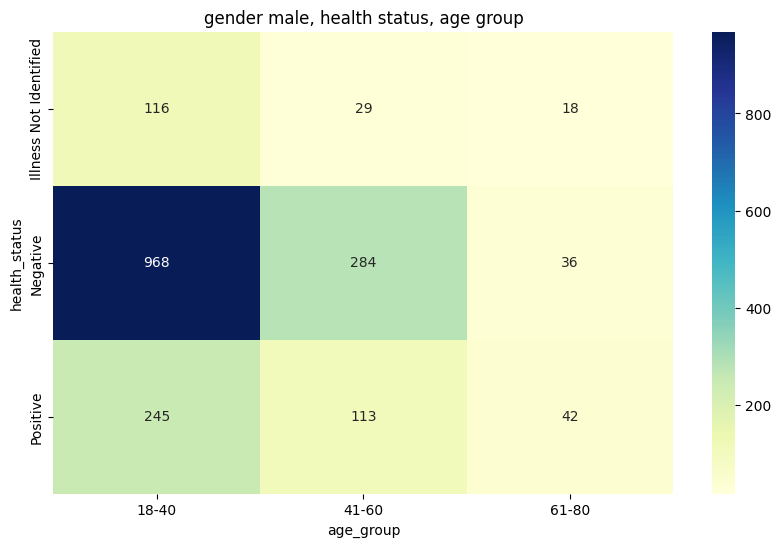

In [73]:
segmented_data = data_male.groupby(['health_status','age_group']).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(segmented_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('gender male, health status, age group')
plt.xlabel('age_group')
plt.ylabel('health_status')
plt.show()

/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_1025/1974254886.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_data = data_female.groupby(['health_status','age_group']).size().unstack(fill_value=0)


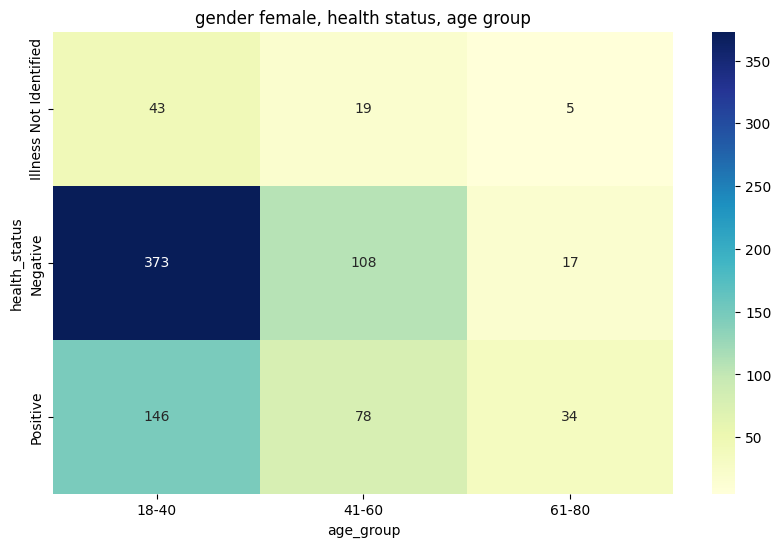

In [74]:
segmented_data = data_female.groupby(['health_status','age_group']).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(segmented_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('gender female, health status, age group')
plt.xlabel('age_group')
plt.ylabel('health_status')
plt.show()

In [75]:
data['health_status'].value_counts()

health_status
Negative                  1786
Positive                   659
Illness Not Identified     230
Name: count, dtype: int64

In [76]:
data_male = data_male.loc[data['health_status']!='Illness Not Identified']

In [77]:
data_female = data_female.loc[data['health_status']!='Illness Not Identified']

/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_1025/3554528341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_data = data_male.groupby(['health_status','age_group']).size().unstack(fill_value=0)


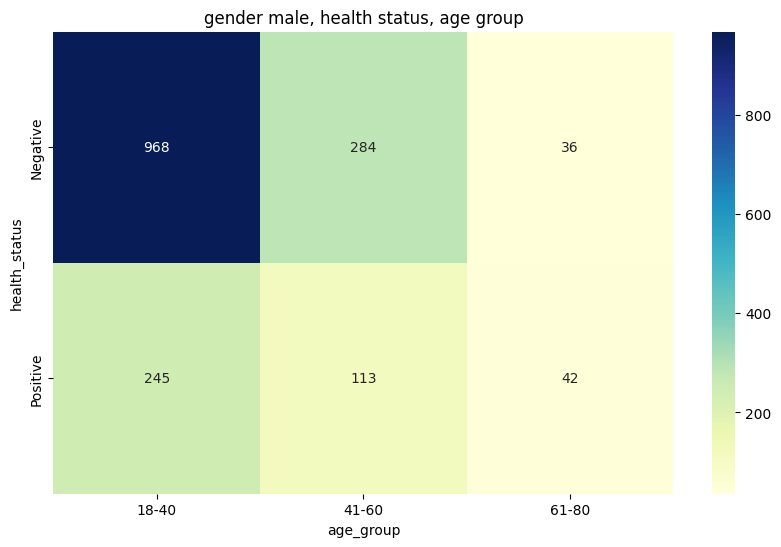

In [78]:
segmented_data = data_male.groupby(['health_status','age_group']).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(segmented_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('gender male, health status, age group')
plt.xlabel('age_group')
plt.ylabel('health_status')
plt.show()

/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_1025/1974254886.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_data = data_female.groupby(['health_status','age_group']).size().unstack(fill_value=0)


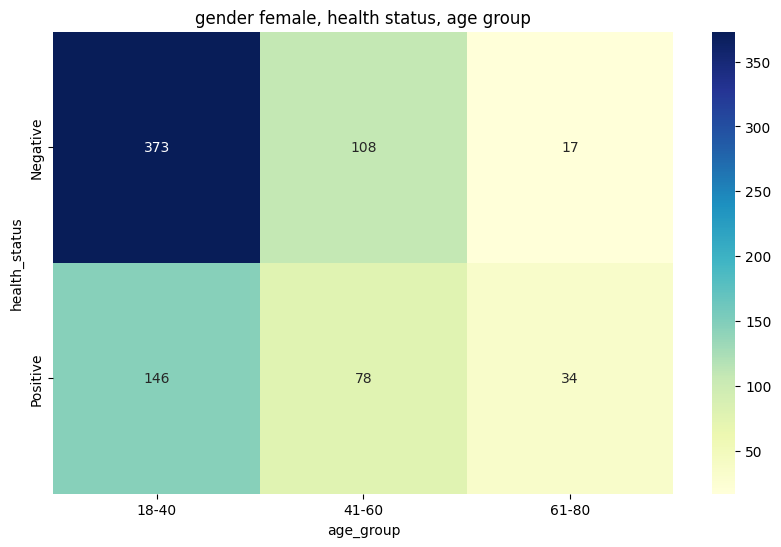

In [79]:
segmented_data = data_female.groupby(['health_status','age_group']).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(segmented_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('gender female, health status, age group')
plt.xlabel('age_group')
plt.ylabel('health_status')
plt.show()

In [27]:
data['gender'] = data['gender'].astype('category')
data['health_status'] = data['health_status'].astype('category')
data['age_group'] = data['age_group'].astype('category')

In [207]:
data['gender'].info()
data['health_status'].info()
data['age_group'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2675 entries, 0 to 2674
Series name: gender
Non-Null Count  Dtype   
--------------  -----   
2675 non-null   category
dtypes: category(1)
memory usage: 2.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 2675 entries, 0 to 2674
Series name: health_status
Non-Null Count  Dtype   
--------------  -----   
2675 non-null   category
dtypes: category(1)
memory usage: 2.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 2675 entries, 0 to 2674
Series name: age_group
Non-Null Count  Dtype   
--------------  -----   
2675 non-null   category
dtypes: category(1)
memory usage: 2.9 KB


In [208]:
data_grouped = data

In [192]:
# data_grouped = data.groupby(['gender', 'health_status', 'age_group'])

/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_50909/3880176717.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped = data.groupby(['gender', 'health_status', 'age_group'])


In [209]:
data_grouped.describe()

index          age      fv      QUALITY   QUALITY_vowel-o_labels  \
count  2675.000000  2675.000000  2009.0  2674.000000              2674.000000   
mean   1370.179065    35.420187     2.0     1.752431                 1.554974   
std     794.430652    13.471204     0.0     0.563283                 0.696960   
min       0.000000    18.000000     2.0     0.000000                 0.000000   
25%     679.500000    25.000000     2.0     2.000000                 1.000000   
50%    1364.000000    31.000000     2.0     2.000000                 2.000000   
75%    2057.500000    44.000000     2.0     2.000000                 2.000000   
max    2745.000000    80.000000     2.0     2.000000                 2.000000   

        QUALITY_counting-fast_labels   QUALITY_vowel-e_labels  \
count                    2675.000000              2675.000000   
mean                        1.696075                 1.695327   
std                         0.628395                 0.632778   
min                         0.000000                 0.000000   
25%                         2.000000                 2.000000   
50%                         2.000000                 2.000000   
75%                         2.000000                 2.000000   
max                         2.000000                 2.000000   

        QUALITY_breathing-deep_labels   QUALITY_breathing-shallow_labels  \
count                     2675.000000                        2675.000000   
mean                         1.554766                           1.528972   
std                          0.756109                           0.766371   
min                          0.000000                           0.000000   
25%                          1.000000                           1.000000   
50%                          2.000000                           2.000000   
75%                          2.000000                           2.000000   
max                          2.000000                           2.000000   

        QUALITY_counting-normal_labels   QUALITY_cough-heavy_labels  \
count                       2675.00000                  2675.000000   
mean                           1.75028                     1.773458   
std                            0.59642                     0.569321   
min                            0.00000                     0.000000   
25%                            2.00000                     2.000000   
50%                            2.00000                     2.000000   
75%                            2.00000                     2.000000   
max                            2.00000                     2.000000   

        QUALITY_vowel-a_labels  chroma_0_cough_heavy  chroma_1_cough_heavy  \
count              2675.000000           2632.000000           2632.000000   
mean                  1.669159              0.410903              0.411760   
std                   0.647244              0.122562              0.122432   
min                   0.000000              0.000000              0.000000   
25%                   2.000000              0.340274              0.343007   
50%                   2.000000              0.417040              0.417606   
75%                   2.000000              0.493154              0.489756   
max                   2.000000              0.895442              0.831843   

       chroma_2_cough_heavy  chroma_3_cough_heavy  chroma_4_cough_heavy  \
count           2632.000000           2632.000000           2632.000000   
mean               0.412853              0.413365              0.416948   
std                0.123425              0.121019              0.121102   
min                0.000000              0.000000              0.000000   
25%                0.345808              0.346763              0.350724   
50%                0.418820              0.421283              0.424427   
75%                0.489302              0.490234              0.496721   
max                1.000000              0.915384              0.8307

In [210]:
data_grouped[['rms_breathing_deep','rms_breathing_shallow']].mean()

rms_breathing_deep       0.038690
rms_breathing_shallow    0.042649
dtype: float64

In [195]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [212]:
formula = 'rms_breathing_deep ~ C(gender) + C(health_status) + C(age_group) + C(gender):C(health_status) + C(gender):C(age_group) + C(health_status):C(age_group) + C(gender):C(health_status):C(age_group)'

# Fit the model
model = ols(formula, data=data_grouped).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of

sum_sq      df             F  \
C(gender)                               -1.562622e-13     2.0 -7.682712e-11   
C(health_status)                         1.299895e-01     2.0  6.391004e+01   
C(age_group)                             8.749146e-03     2.0  4.301564e+00   
C(gender):C(health_status)               1.416743e-03     4.0  3.482747e-01   
C(gender):C(age_group)                   2.772486e-04     4.0  6.815536e-02   
C(health_status):C(age_group)            1.656099e-04     4.0  4.071149e-02   
C(gender):C(health_status):C(age_group)  3.510577e-02     8.0  4.314984e+00   
Residual                                 2.661418e+00  2617.0           NaN   

                                               PR(>F)  
C(gender)                                1.000000e+00  
C(health_status)                         1.934940e-15  
C(age_group)                             3.817492e-02  
C(gender):C(health_status)               7.059377e-01  
C(gender):C(age_group)                   9.341170e-01  
C(health_status):C(age_group)            9.601067e-01  
C(gender):C(health_status):C(age_group)  6.518318e-04  
Residual                                          NaN